# Creating a binary dataset and fine-tuning BERT

In [107]:
import openai
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#for pytorch
import torch
import torch.nn as nn
device = torch.device("cpu")

#for BERT
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import AdamW

### Creating the Dataset

In [17]:
openai.api_key = os.environ.get("OPENAI_API_KEY")


In [19]:
sentiments = ['positive','negative']
entries = []

for sentiment in sentiments:
    prompt = "Write a journal entry where the writer is feeling {}. Imagine you are the writer writing in your own personal diary.".format(sentiment)
    for i in range(500):
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",  
            prompt=prompt,
            max_tokens=250,  
            temperature=0.7, 
        )
        generated_text = response.choices[0].text
        entries.append(generated_text)

In [21]:
print(entries[0])



Dear Diary,

Today has been such a wonderful day, and I can't help but feel incredibly positive and grateful. The sun was shining brightly, and the birds were chirping, creating the perfect backdrop for my morning meditation. As I closed my eyes and focused on my breath, I felt a sense of peace and contentment wash over me. It was a great way to start my day.

After my meditation, I decided to go for a walk in the park. The crisp air and the beautiful scenery were exactly what I needed to clear my mind and recharge my batteries. I also bumped into an old friend who I haven't seen in years. We had a lovely catch-up session, and it was heartwarming to see how much we have both grown and achieved since we last saw each other.

As I continued my walk, I couldn't help but reflect on all the blessings in my life. I have a loving family, supportive friends, and a job that I am passionate about. Despite all the challenges and setbacks, I have faced, I am still standing strong and moving forw

In [23]:
print(entries[500])



Dear Diary,

I am feeling so overwhelmed and negative today. It seems like everything is going wrong and I just can't catch a break. Every little thing that happens just adds to my already heavy load of negative emotions.

I woke up this morning feeling exhausted and unmotivated. I didn't want to get out of bed, but I knew I had to face another day. As soon as I stepped out of the house, it started raining. Of course, I forgot my umbrella and got completely drenched. It's like the universe is conspiring against me.

Work was a disaster. My boss was in a terrible mood and took it out on me. I tried my best to keep my head down and get my work done, but I couldn't shake off the feeling of being constantly watched and criticized. I feel like no matter how hard I work, it's never enough.

And to top it all off, I got into an argument with my best friend. I don't even remember what it was about, but now we're not speaking to each other. It's like I'm losing the people closest to me and I 

In [24]:
print(len(entries))

1000


Now we have 1000 entries. 500 positive and 500 negative. Now let's make our dataset.

In [44]:
labels = 500 * [1] # postive labels
labels.extend(500 * [0]) # negative labels
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [64]:
data = {
    'entry': entries,
    'label':labels
}
df = pd.DataFrame(data)
df

,entry,label
0,"\n\nDear Diary,\n\nToday has been such a wonde...",1
1,"\n\nDear Diary,\n\nToday has been such a wonde...",1
2,"\n\nDear Diary,\n\nToday has been a wonderful ...",1
3,"\n\nDear Diary,\n\nToday has been a wonderful ...",1
4,"\n\nDear Diary,\n\nToday, I am feeling incredi...",1
...,...,...
995,"\n\nDear diary,\n\nToday has been a rough day....",0
996,"\n\nDear Diary,\n\nToday has been one of those...",0
997,"\n\nDear Diary,\n\nToday has been one of those...",0
998,"\n\nDear Diary,\n\nToday has been a difficult ...",0


Shuffling the dataset

In [65]:
df = df.sample(frac=1)
df

,entry,label
545,"\n\nDear Diary,\n\nI am feeling extremely nega...",0
718,"\n\nDear diary,\n\nToday has been a really tou...",0
604,"\n\nDear Diary,\n\nI'm feeling so overwhelmed ...",0
947,"\n\nDear Diary,\n\nToday has been a rough day....",0
492,"\n\nDear diary,\n\nToday has been a wonderful ...",1
...,...,...
734,"\n\nDear Diary,\n\nToday has been one of those...",0
420,"\n\nDear Diary,\n\nToday has been such a wonde...",1
467,"\n\nDear Diary,\n\nToday has been such a wonde...",1
840,"\n\nDear Diary, \n\nI can't seem to shake off ...",0


In [66]:
df.to_csv('binary_entries.csv', index=False)

### Preparing the Dataset

In [67]:
df = pd.read_csv('binary_entries.csv')
df

,entry,label
0,"\n\nDear Diary,\n\nI am feeling extremely nega...",0
1,"\n\nDear diary,\n\nToday has been a really tou...",0
2,"\n\nDear Diary,\n\nI'm feeling so overwhelmed ...",0
3,"\n\nDear Diary,\n\nToday has been a rough day....",0
4,"\n\nDear diary,\n\nToday has been a wonderful ...",1
...,...,...
995,"\n\nDear Diary,\n\nToday has been one of those...",0
996,"\n\nDear Diary,\n\nToday has been such a wonde...",1
997,"\n\nDear Diary,\n\nToday has been such a wonde...",1
998,"\n\nDear Diary, \n\nI can't seem to shake off ...",0


Split the data into train, validation ad test data. We are taking the 70:15:15 ratio for this division

In [70]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['entry'], df['label'],
																	random_state = 2021,
																	test_size = 0.3,
																	stratify = df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
																random_state = 2021,
																test_size = 0.5,
																stratify = temp_labels)


#### Load pre-trained BERT model and tokenizer

In [76]:
#load model and tokenizer
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

#### Deciding the padding length

If we take the padding length as the maximum length of text found in the training texts, it might leave the training data sparse. Taking the least length would in turn lead to loss of information. Hence, we would plot the graph and see the “average” length and set it as the padding length to trade-off between the two extremes.

(array([  2.,  11.,  31.,  54.,  84., 123., 115., 133., 101.,  46.]),
 array([196. , 199.1, 202.2, 205.3, 208.4, 211.5, 214.6, 217.7, 220.8,
        223.9, 227. ]),
 <BarContainer object of 10 artists>)

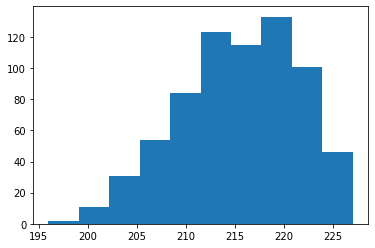

In [82]:
train_lens = [len(i.split()) for i in train_text]
plt.hist(train_lens)

In [89]:
print(sum(train_lens)/len(train_lens))

215.27285714285713


From the graph above, we take 215 as the padding length.

#### Tokenizing the data

In [92]:
pad_len = 215
# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
	train_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_val = tokenizer.batch_encode_plus(
	val_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_test = tokenizer.batch_encode_plus(
	test_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [122]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 64

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

#### Defining the model

We first freeze the BERT pre-trained model, and then add layers as shown in the following code snippets:

In [98]:
#freeze the pretrained layers
for param in bert.parameters():
	param.requires_grad = False

#defining new layers
class BERT_architecture(nn.Module):
	
	def __init__(self, bert):
		
		super(BERT_architecture, self).__init__()
		
		self.bert = bert
		
        # dropout layer
		self.dropout = nn.Dropout(0.2)
		
        # relu activation function
		self.relu = nn.ReLU()
		
        # dense layer 1
		self.fc1 = nn.Linear(768,512)
		
        # dense layer 2 (Output layer)
		self.fc2 = nn.Linear(512,2)
		
        # softmaz activation function
		self.softmax = nn.LogSoftmax(dim=1)

	#define the forward pass
	def forward(self, sent_id, mask):
		
		# pass the inputs to the model
		_, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
		
		x = self.fc1(cls_hs)
		
		x = self.relu(x)
		
		x = self.dropout(x)
		
		# output layer
		x = self.fc2(x)
		
		# apply softmax activation
		x = self.softmax(x)
		
		return x


In [106]:
# pass the pre-trained BERT to our define architecture
model = BERT_architecture(bert)

# push the model to GPU
model = model.to(device)

Also, add an optimizer to enhance the performance:

In [108]:
optimizer = AdamW(model.parameters(),lr = 1e-5) # learning rate

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [123]:
# function to train the model
def train():
	
    model.train()

    total_loss, total_accuracy = 0, 0
        
    # empty list to save model predictions
    total_preds=[]
        
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print(' Batch {:>5,} of {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()		

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

        # append the model predictions
        total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
        
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    total_preds = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds


In [124]:
# function for evaluating the model
def evaluate():
	
    print("\nEvaluating...")
	
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
        
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # # Calculate elapsed time in minutes.
            # elapsed = format_time(time.time() - t0)
                
            # Report progress.
            print(' Batch {:>5,} of {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


Now let's fine-tune

In [114]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels 
                                     )
print("class weights are {} for {}".format(class_weights,np.unique(train_labels)))

class weights are [1. 1.] for [0 1]


In [115]:
#count of both the categories of training labels
pd.value_counts(train_labels)

1    350
0    350
Name: label, dtype: int64

In [116]:
#wrap class weights in tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push weights to GPU
weights = weights.to(device)

# define loss function
# add weights to handle the "imbalance" in the dataset
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [125]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print('\nTraining Loss: {}'.format(train_loss))
    print('Validation Loss: {}'.format(valid_loss))


 Epoch 1 / 10

Evaluating...

Training Loss: 0.6937006441029635
Validation Loss: 0.685279111067454

 Epoch 2 / 10

Evaluating...

Training Loss: 0.6821994673122059
Validation Loss: 0.6742629408836365

 Epoch 3 / 10

Evaluating...

Training Loss: 0.6711260676383972
Validation Loss: 0.6650431950887045

 Epoch 4 / 10

Evaluating...

Training Loss: 0.6659159660339355
Validation Loss: 0.6574570536613464

 Epoch 5 / 10

Evaluating...

Training Loss: 0.6552089832045815
Validation Loss: 0.6523558100064596

 Epoch 6 / 10

Evaluating...

Training Loss: 0.6486639055338773
Validation Loss: 0.6454890171686808

 Epoch 7 / 10

Evaluating...

Training Loss: 0.6388522169806741
Validation Loss: 0.6389378507932028

 Epoch 8 / 10

Evaluating...

Training Loss: 0.6359877152876421
Validation Loss: 0.6315509080886841

 Epoch 9 / 10

Evaluating...

Training Loss: 0.6332109841433439
Validation Loss: 0.6254816055297852

 Epoch 10 / 10

Evaluating...

Training Loss: 0.6239600669253956
Validation Loss: 0.6214003

In [126]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [127]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [128]:
from sklearn.metrics import classification_report

In [129]:
pred = np.argmax(preds, axis = 1)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        75
           1       0.81      0.97      0.88        75

    accuracy                           0.87       150
   macro avg       0.89      0.87      0.87       150
weighted avg       0.89      0.87      0.87       150

